In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
print(df.columns)
print(df["Churn"].value_counts(normalize=True))

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [4]:
df.isna().sum().sort_values(ascending=False).head()

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
dtype: int64

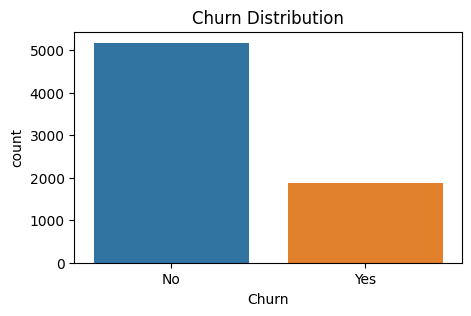

In [5]:
import os
FIG_DIR = 'figure'
os.makedirs(FIG_DIR, exist_ok=True)

plt.figure(figsize=(5,3))

sns.countplot(x="Churn", data=df)

plt.title("Churn Distribution")
plt.savefig(FIG_DIR + '/churn_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [6]:
df.head()
medians = df.groupby("Churn")["MonthlyCharges"].median()
medians

Churn
No     64.425
Yes    79.650
Name: MonthlyCharges, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

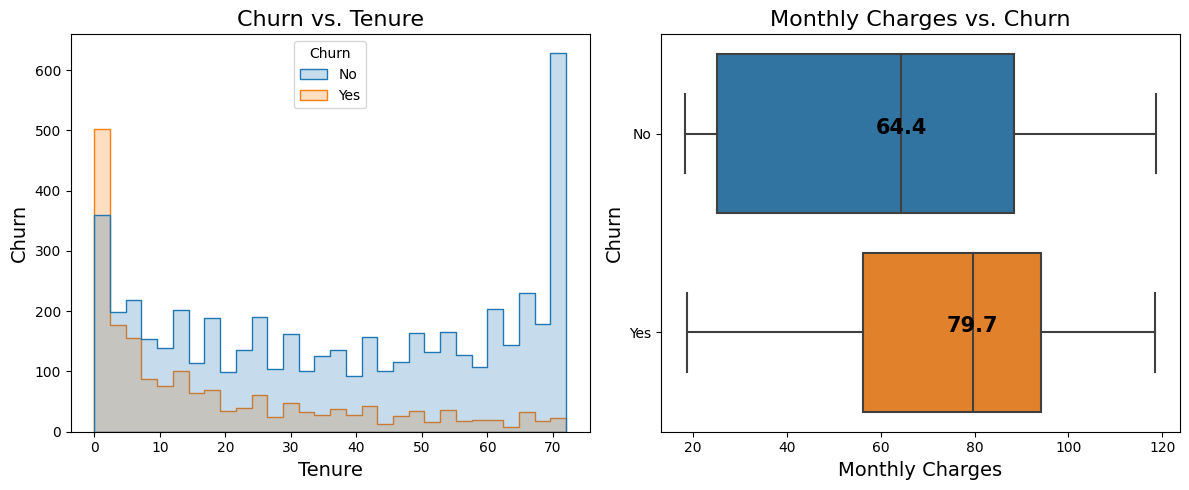

In [7]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=False, ax=axs[0])
sns.histplot(
    data=df, x="tenure", hue="Churn",
    bins=30, kde=False, ax=axs[0],
    element="step", legend=True
)
axs[0].set_title("Churn vs. Tenure", fontsize=16)
axs[0].set_xlabel("Tenure", fontsize=14)
axs[0].set_ylabel("Churn", fontsize=14)
sns.move_legend(
    axs[0], "upper center",
    bbox_to_anchor=(0.5, 1.0),
    ncol=1,frameon=True
)

sns.boxplot(data=df, x='MonthlyCharges', y='Churn', ax=axs[1])
axs[1].set_title("Monthly Charges vs. Churn", fontsize=16)
axs[1].set_xlabel("Monthly Charges", fontsize=14)
axs[1].set_ylabel("Churn", fontsize=14)
for i, (churn, median) in enumerate(medians.items()):
    axs[1].text(median, i, f'{median:.1f}',
                horizontalalignment='center',
                color='black', fontsize=15, weight='bold')

# sns.kdeplot(data=df, x='TotalCharges', hue='Churn', common_norm=False, fill=True, ax=axs[2])
# axs[2].set_title("Total Charges Distribution by Churn")

plt.tight_layout()
plt.savefig(FIG_DIR + '/churn_vs.png', dpi=200, bbox_inches='tight')
plt.show()

In [8]:
OUT_DIR = 'processed'
os.makedirs(OUT_DIR, exist_ok=True)

# df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({"Yes": 1, "No": 0})
df['PhoneService'] = df['PhoneService'].map({"Yes": 1, "No": 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({"Yes": 1, "No": 0})

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df_proc = df[['tenure', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'Contract', 
              'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df_orig = df.copy()
df_proc.to_csv(OUT_DIR + '/processed.csv')
df_orig.to_csv(OUT_DIR + '/orig.csv')
# df = pd.get_dummies(df, drop_first=True)